In [1]:
%matplotlib inline
import lsst.sims.skybrightness as sb
import numpy as np
import SkyModelPre as sbp
import healpy as hp
import lsst.sims.utils as utils
import timeit

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
nside = 32
hpindx = np.arange(hp.nside2npix(nside))
ra, dec = utils._hpid2RaDec(nside, hpindx)

classic_model = sb.SkyModel(mags=True)

In [3]:
new_model = sbp.SkyModelPre('generated_sky.npz')

In [4]:
def callClassic(sm, ra, dec, mjds):
    for mjd in mjds:
        sm.setRaDecMjd(ra, dec, mjd)
        mags = sm.returnMags()

In [5]:
def callNew(sm, mjds):
    for mjd in mjds:
        mags = sm.full_sky(mjd)

In [6]:
step = 2. /60. / 24.  # 2 minute timestep
mjds = np.arange(200)*step + 59560.2+0.1

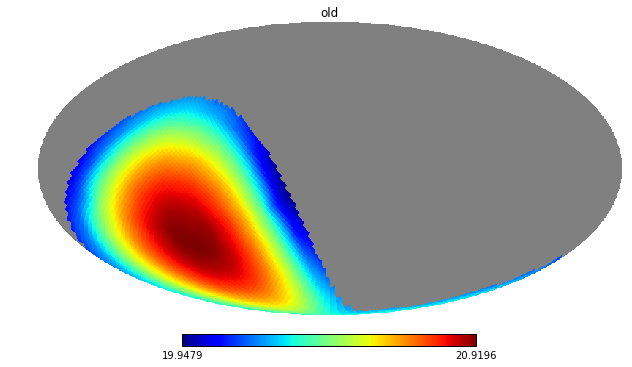

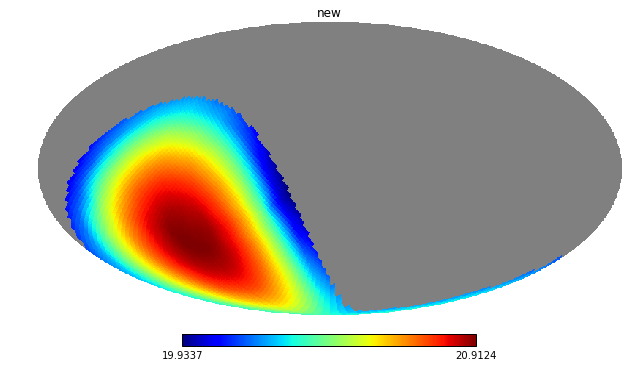

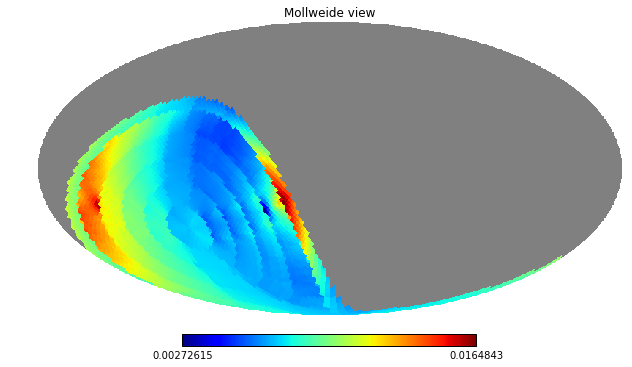

In [10]:
# Check that the results from the 2 look similar
# mjd = mjds[100]
mjd = new_model.info['mjds'][10]+.001
classic_model.setRaDecMjd(ra, dec, mjd)
mags1 = classic_model.returnMags()
hp.mollview(mags1['r'], title='old')
mags2 = new_model.full_sky(mjd)
hp.mollview(mags2['r'], title='new')
diff = mags1['r'] - mags2['r']
diff[np.where( (mags1 == hp.UNSEEN) | (mags2 == hp.UNSEEN))] = hp.UNSEEN
hp.mollview(diff)

In [11]:
time1 = timeit.timeit("callClassic(classic_model,ra ,dec, mjds)", number=1, 
                     setup="from __main__ import callClassic, classic_model,ra,dec,mjds")
print 'Classic model time = %f' % time1

Classic model time = 30.921645


In [12]:
time = timeit.timeit("callNew(new_model, mjds)", number=1, 
                     setup="from __main__ import callNew, new_model, mjds")
print 'New model time = %f' % time

New model time = 0.001904


In [13]:
print "speedup factor = %f" % (time1/time)

speedup factor = 16240.267969


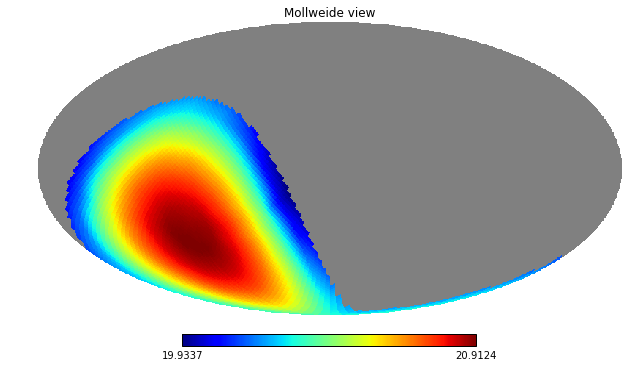

In [14]:
hp.mollview(new_model.sb['r'][10,:])